# 3-6. 프로젝트: 고양이 수염 스티커 만들기

## Step 1. 스티커 구하기 or 만들기

(1) 고양이 수염 이미지를 다운로드 받아주세요.

(2) 여러분의 셀카 이미지도 촬영해 주세요.

In [ ]:
# 샘플이미지
# my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
# my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/sorakang.jpg'
# 수염이미지
# sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'

## Step 2. 얼굴 검출 & 랜드마크 검출 하기
오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

In [2]:
# 패키지 로드
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


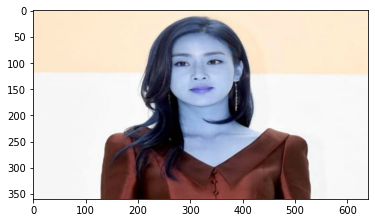

In [3]:
# 이미지 로드
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/sorakang.jpg'
#my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

rectangles[[(253, 67) (382, 196)]]


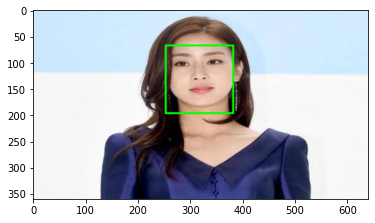

In [6]:
# 얼굴 검출
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) 

print(dlib_rects)   # 찾은 얼굴영역 좌표
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


68


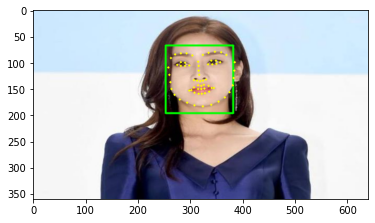

In [8]:
# 랜드마크 
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# 노란 점으로 표시
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


## Step 3. 스티커 적용 위치 확인하기

볼은 '턱', '눈', '입', '코' 사이에 있다는 점을 이용해 주세요. 비율로 계산하는 방법 잊지 않으셨죠?

hint 2, 36, 48, 30 번 인덱스를 이용

In [9]:
# 중앙좌표구하기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[2]) # nose center index : 2
    print (landmark[30]) # nose center index : 30
    print (landmark[36]) # nose center index : 36
    print (landmark[48]) # nose center index : 348
    
    # 2, 30번을 이용해서 X좌표를
    # 36, 48번을 이용해서 Y좌표를 구한다.
    x = (landmark[2][0] + landmark[30][0]) // 2
    y = (landmark[36][1] + landmark[48][1]) // 2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(262, 137)
(317, 123)
(275, 104)
(298, 153)
(x,y) : (289,128)
(w,h) : (130,130)


In [10]:
# 수염이미지 확인
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

print (img_sticker.shape)

(130, 130, 3)


**중앙좌표를 구했으니, 그 보다 (x, y) 를 더 위와 왼쪽으로 이동해서 수염을 그릴 시작좌표로 이동한다.**

In [11]:
# 수염이미지 표시할 시작좌표 구하기
refined_x = x - w//4
refined_y = y - h//2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (257,63)


## Step 4. 스티커 적용하기

### (1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

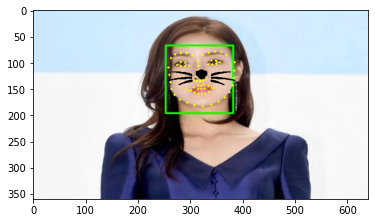

In [12]:
# 작업이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] \
= np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

# 스티커 이미지 적용
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

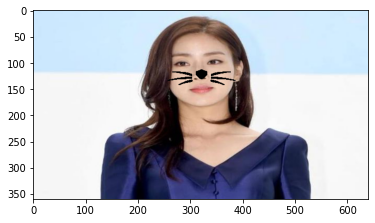

In [13]:
# 원본에 스티커 이미지 적용
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] \
= np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

# 스티커 이미지 적용
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### (2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다.

hint opencv 의 cv2.addWeighted() 를 참고하세요.

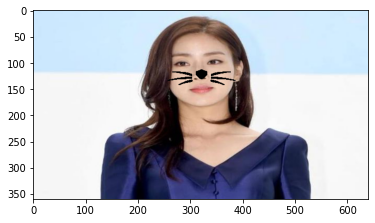

In [14]:
# addWeighted 에서 사용할 조정값 
alpha = 0.2

img_back=img_bgr.copy()
sticker_area = img_back[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# addWeighted 적용
sticker_area2 = cv2.addWeighted(sticker_area, 1-alpha, img_sticker, alpha, 0) 

img_back[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] \
= np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_back, cv2.COLOR_BGR2RGB))
plt.show()

### Step 5. 문제점 찾아보기

(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

>* 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
* 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
* 실행 속도가 중요할까요?
* 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

문제점 : 아직 이미지를 처리하는거에 대한 완벽한 이해가 되지 못하였음
 얼굴각도에 따라서 스티커를 회전시켜줘야 할 것 같은데 어떻게 할지 잘 모르겠음

## 회고



- 이번 프로젝트에서 어려웠던 점

<hr>

1. 이미지에 대한 처리가 처음이어서 구조가 100% 이해가 가지는 않았음

2. 2차원 / 3차원 배열에 대해서 아직도 헷갈림..
   RGB + 채널에 의해서 3차원 의 배열이 만들어지는데... @, @ );;;


- 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점.

<hr>

1. addWeighted()를 붙여서 적용은 했으나, 인자 및 돌아가는 부분에 대해서 확실히는 잘 모르겠음

2. sticker_area와 np.where , plt, cv2에 대한 확실한 동작 내용을 잘 모르겠음



- 루브릭 평가 지표를 맞추기 위해 시도한 것들.

<hr>

고양이 수염 스티커의 위치를 잡기위해서, 이것저것 좌표를 만지작 거렸음


- 만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정.

<hr>

측면사진을 찍어서 그에 맞게 고양이 스티커를 회전시켜서 붙여야 하는 것으로 알고는 있으나
관련 코드를 어떻게 해야하는지 모르겠음



- 자기 다짐

<hr>

앞으로 교육기간내에  다시 이미지를 다룰 상황이 있으면, 좀 더 찾아보고 내용을 완벽히 이해할 수 있도록 노력하겠음!!